In [50]:
#Importar librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

In [51]:
#Importartar data set
data=pd.read_csv('vistara.csv')

In [52]:
data=data.drop(['Unnamed: 11'], axis=1)


In [53]:
data['dolares'] = data['price'] * 0.12

In [54]:
data.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,dolares
0,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,16,1714,205.68
1,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,17,1714,205.68
2,Vistara,UK-897,Bangalore,Early_Morning,zero,Morning,Hyderabad,Economy,1.17,17,1714,205.68


In [55]:
#Información
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127859 entries, 0 to 127858
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           127859 non-null  object 
 1   flight            127859 non-null  object 
 2   source_city       127859 non-null  object 
 3   departure_time    127859 non-null  object 
 4   stops             127859 non-null  object 
 5   arrival_time      127859 non-null  object 
 6   destination_city  127859 non-null  object 
 7   class             127859 non-null  object 
 8   duration          127859 non-null  float64
 9   days_left         127859 non-null  int64  
 10  price             127859 non-null  int64  
 11  dolares           127859 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 11.7+ MB


In [56]:
# columnas y filas
data.shape


(127859, 12)

In [57]:
#Variables dataset
data.describe()


,duration,days_left,price,dolares
count,127859.000000,127859.000000,127859.000000,127859.000000
mean,13.326634,25.894532,30396.536302,3647.584356
std,6.777230,13.638537,25637.159445,3076.459133
min,1.000000,1.000000,1714.000000,205.680000
25%,8.500000,14.000000,6412.000000,769.440000
50%,12.500000,26.000000,15543.000000,1865.160000
75%,17.000000,38.000000,55377.000000,6645.240000
max,47.080000,49.000000,123071.000000,14768.520000


In [58]:
#Buscar null
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dolares             0
dtype: int64

In [59]:
#Valor unico de cada variable
data.nunique()


airline                1
flight               133
source_city            6
departure_time         5
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             392
days_left             49
price               5303
dolares             5303
dtype: int64

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuciones Data

## Frecuencia ciudad de salida

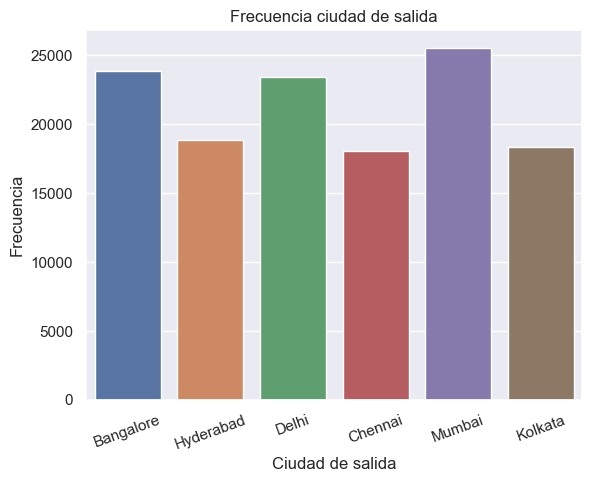

In [61]:
sns.countplot(data=data, x='source_city')
plt.xlabel('Ciudad de salida')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de salida')
plt.xticks(rotation=20)
plt.show()

En la grafica anterior se puede envidenciar que la cuidad de salida más común es Mumbai. Por otro las las cuidades que tienen salida más comun es Bangalore y Delhi. Finalmente las otras cuidades (Hyderabad,chennai,kolkata) tiene una distribución más uniforme.

## Distribución de precios por ciudad de salida

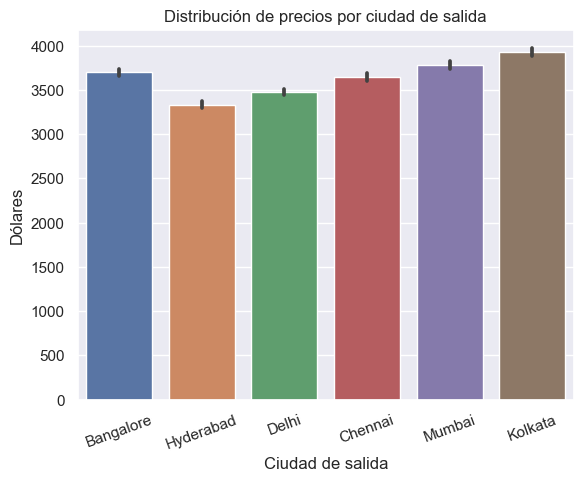

In [62]:
sns.barplot(data=data, x='source_city', y='dolares')
plt.xlabel('Ciudad de salida')
plt.ylabel('Dólares')
plt.title('Distribución de precios por ciudad de salida')
plt.xticks(rotation=20)
plt.show()



## Frecuencia tiempo de partida

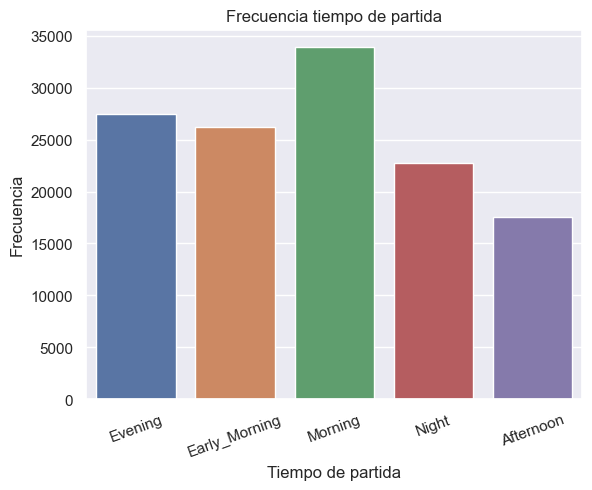

In [63]:
sns.countplot(data=data, x='departure_time')
plt.xlabel('Tiempo de partida')
plt.ylabel('Frecuencia')
plt.title('Frecuencia tiempo de partida')
plt.xticks(rotation=20)
plt.show()

## Distribución de precios por tiempo de partida

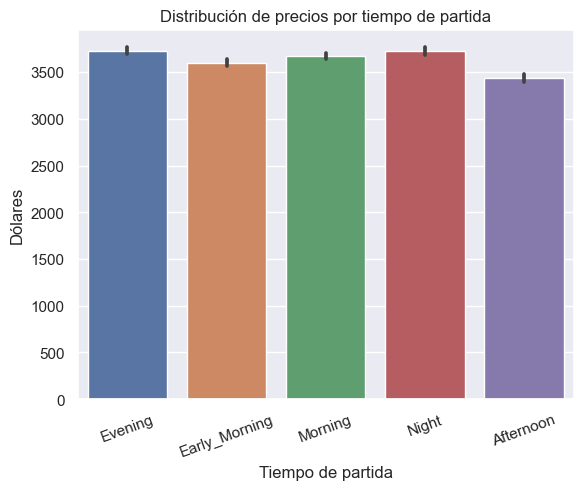

In [64]:
sns.barplot(data=data, x='departure_time', y='dolares')
plt.xlabel('Tiempo de partida')
plt.ylabel('Dólares')
plt.title('Distribución de precios por tiempo de partida')
plt.xticks(rotation=20)
plt.show()

## Frecuencia de escalas

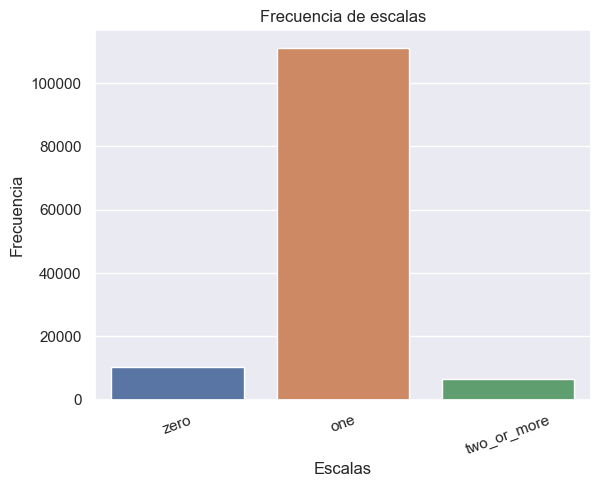

In [65]:
sns.countplot(data=data, x='stops')
plt.xlabel('Escalas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de escalas')
plt.xticks(rotation=20)
plt.show()

## Distribución de precios por escala

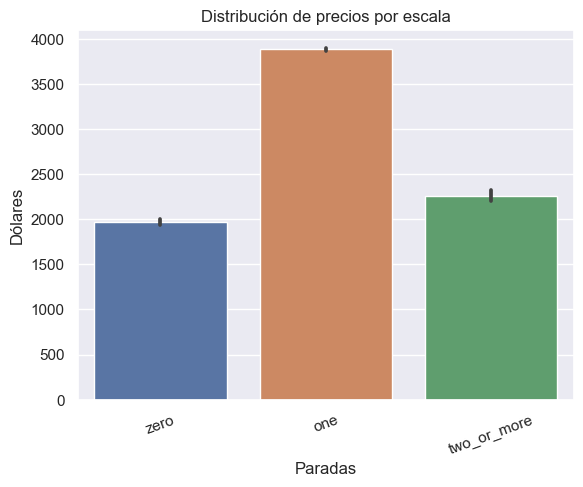

In [66]:
sns.barplot(data=data, x='stops', y='dolares')
plt.xlabel('Paradas')
plt.ylabel('Dólares')
plt.title('Distribución de precios por escala')
plt.xticks(rotation=20)
plt.show()

## Frecuencia ciudad de destino

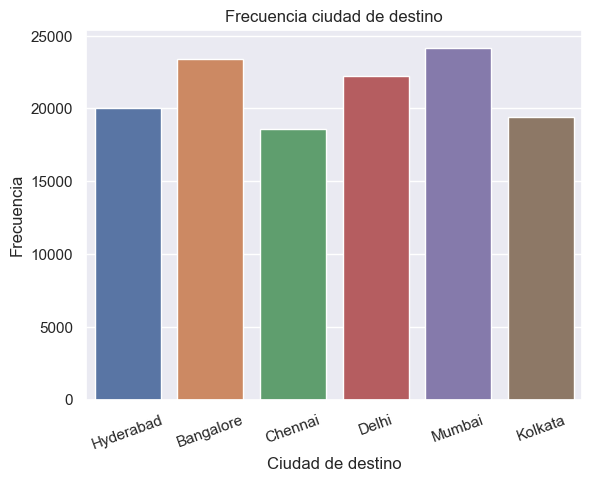

In [67]:
sns.countplot(data=data, x='destination_city')
plt.xlabel('Ciudad de destino')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de destino')
plt.xticks(rotation=20)
plt.show()

## Distribución de precios por ciudad de destino

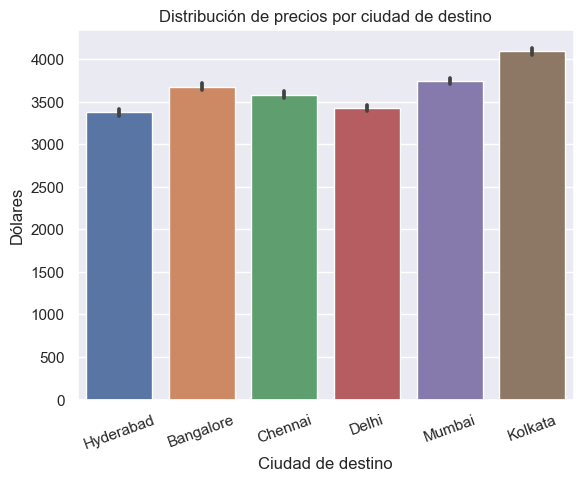

In [68]:
sns.barplot(data=data, x='destination_city', y='dolares')
plt.xlabel('Ciudad de destino')
plt.ylabel('Dólares')
plt.title('Distribución de precios por ciudad de destino')
plt.xticks(rotation=20)
plt.show()

## Frecuencia de clase

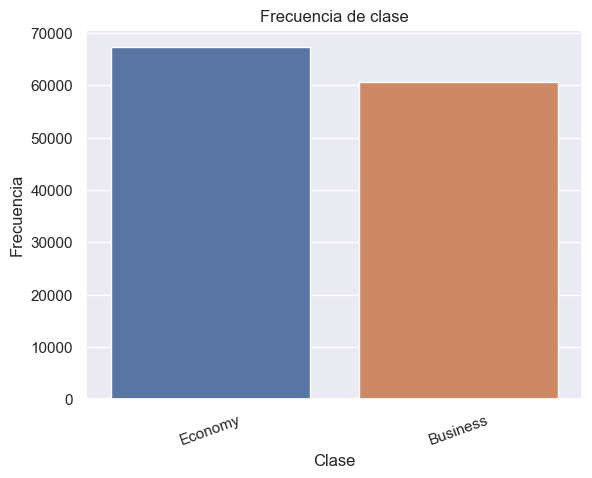

In [69]:
sns.countplot(data=data, x='class')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de clase')
plt.xticks(rotation=20)
plt.show()

## Distribución de precios por clase

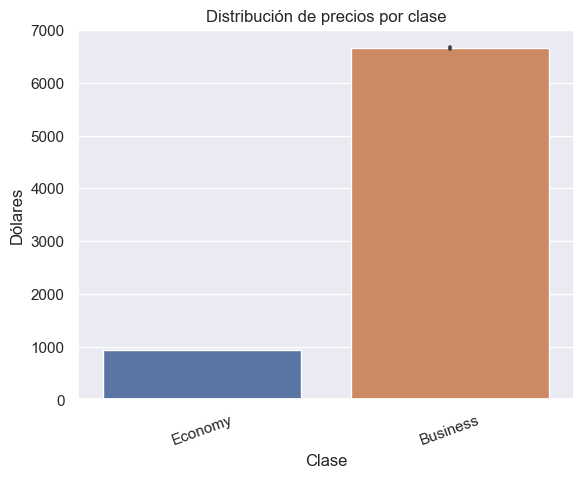

In [70]:
sns.barplot(data=data, x='class', y='dolares')
plt.xlabel('Clase')
plt.ylabel('Dólares')
plt.title('Distribución de precios por clase')
plt.xticks(rotation=20)
plt.show()

## Distribución de duración'

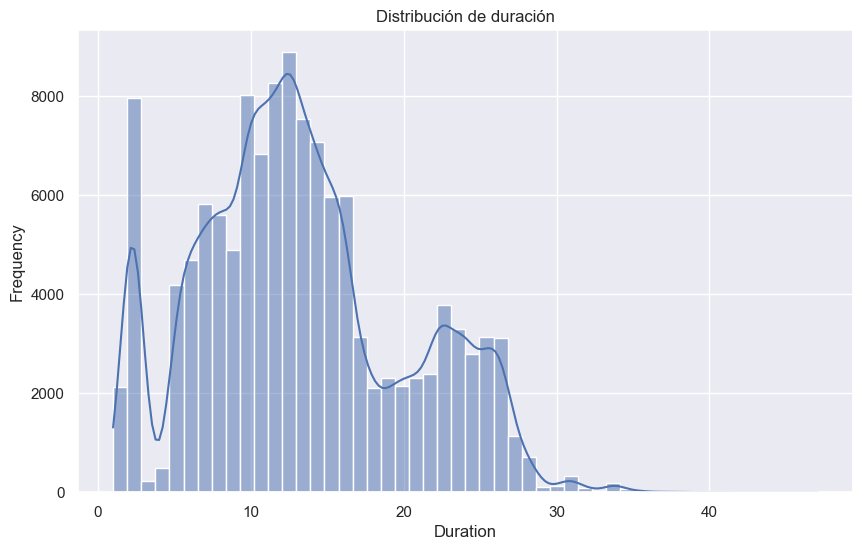

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', bins=50, kde=True)  # Ajusta el número de bins según tus necesidades
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribución de duración')
plt.show()

## Frecuencia ciudad de destino

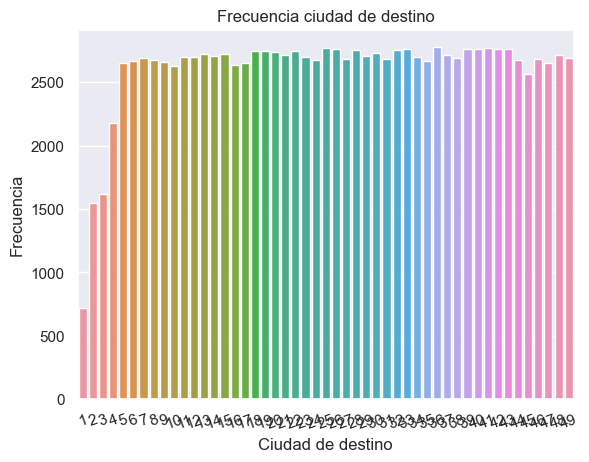

In [72]:
sns.countplot(data=data, x='days_left')
plt.xlabel('Ciudad de destino')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de destino')
plt.xticks(rotation=20)
plt.show()

## Días de salida vs Dolares

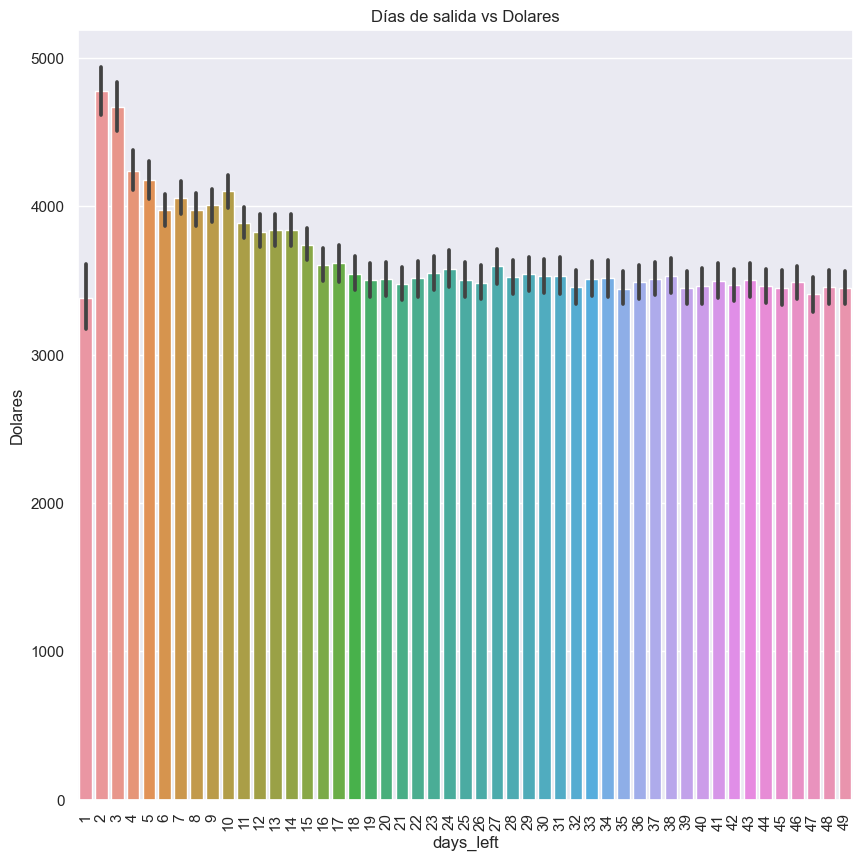

In [73]:
df=sns.set(font_scale=1)
df=plt.figure(figsize=(10, 10)) 
df=sns.barplot(data=data, x='days_left', y='dolares')
df=plt.xlabel('days_left')
df=plt.ylabel('Dolares')
df=plt.title('Días de salida vs Dolares')
df=plt.xticks(rotation=90)
df=plt.show()

# Limpieza de datos

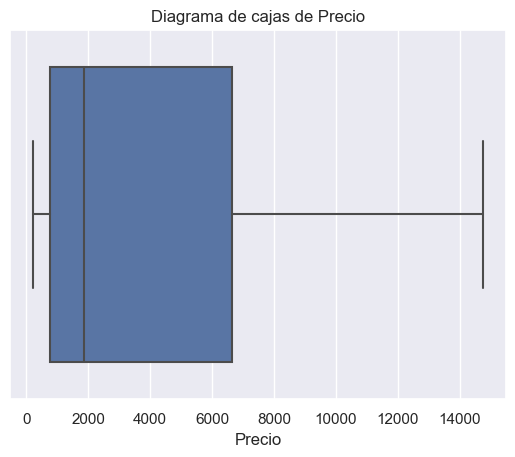

In [74]:
#precio
sns.boxplot(x=data['dolares'])
plt.xlabel('Precio')
plt.title('Diagrama de cajas de Precio')
plt.show()

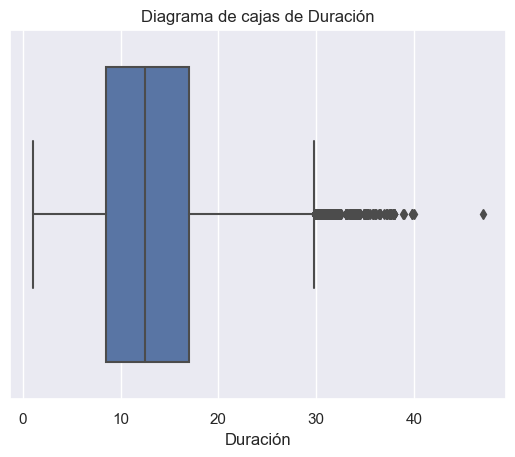

In [75]:
#Duración
sns.boxplot(x=data['duration'])
plt.xlabel('Duración')
plt.title('Diagrama de cajas de Duración')
plt.show()

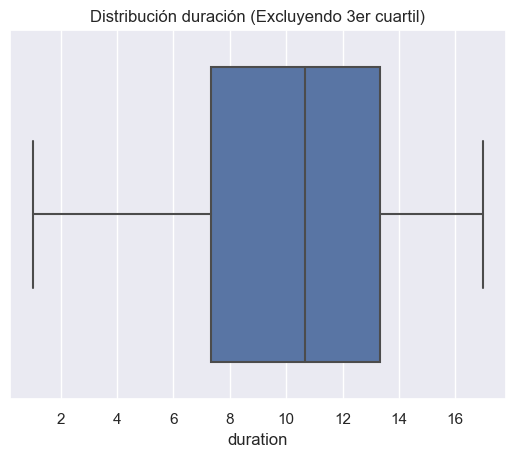

In [76]:
#Calcular el 3er cuartil
tercer_cuartil = data['duration'].quantile(0.75)

# Filtrar los valores que son menores o iguales al tercer cuartil
data_filtrada = data[data['duration'] <= tercer_cuartil]

# Generar el boxplot con los valores filtrados
sns.boxplot(x=data_filtrada['duration'])
plt.xlabel('duration')
plt.title('Distribución duración (Excluyendo 3er cuartil)')
plt.show()

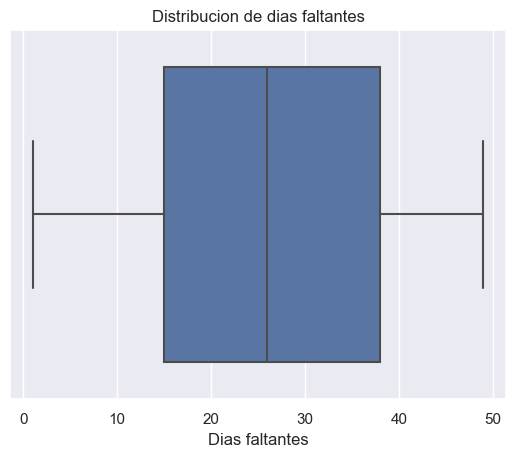

In [77]:
#Dias faltantes
sns.boxplot(x=data_filtrada['days_left'])
plt.xlabel('Dias faltantes')
plt.title('Distribucion de dias faltantes')
plt.show()

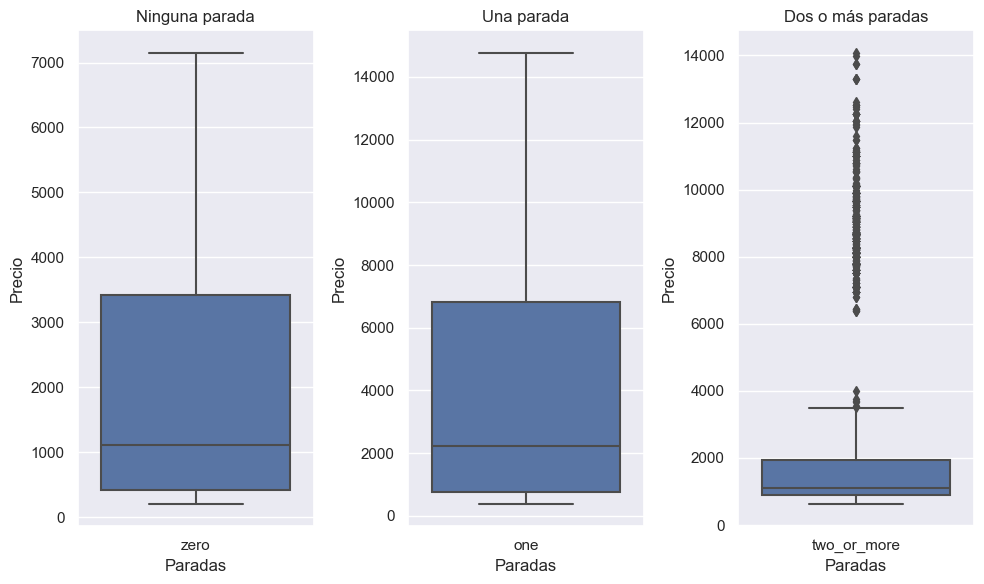

In [78]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'zero'
plt.subplot(1, 3, 1)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'zero'])
plt.title('Ninguna parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'one'
plt.subplot(1, 3, 2)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'one'])
plt.title('Una parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'two_or_more'
plt.subplot(1, 3, 3)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'two_or_more'])
plt.title('Dos o más paradas')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

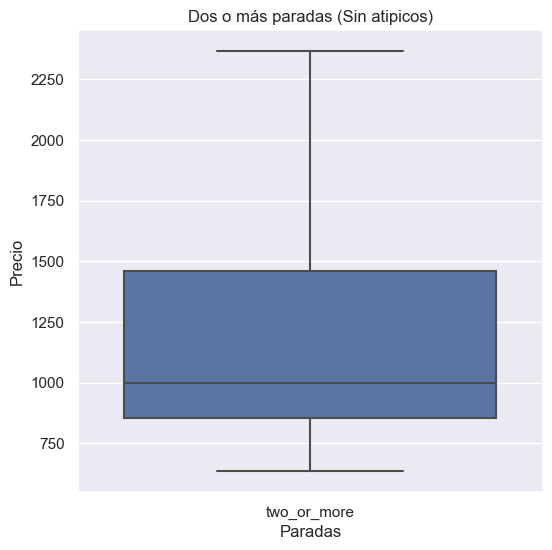

In [79]:

data_filtered = data[data['stops'] == 'two_or_more']

# Calcula el rango intercuartílico (IQR) para la variable 'price'
Q1 = data_filtered['dolares'].quantile(0.25)
Q3 = data_filtered['dolares'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar los valores atípicos
lower_bound = Q1 - 0.4 * IQR
upper_bound = Q3 + 0.4 * IQR

# Filtra los valores que no son atípicos
data_filtrada = data_filtered[(data_filtered['dolares'] >= lower_bound) & (data_filtered['dolares'] <= upper_bound)]

# Crea el boxplot para 'two_or_more' sin valores atípicos
plt.figure(figsize=(6, 6))
sns.boxplot(x='stops', y='dolares', data=data_filtrada)
plt.title('Dos o más paradas (Sin atipicos)')
plt.xlabel('Paradas')
plt.ylabel('Precio')
plt.show()

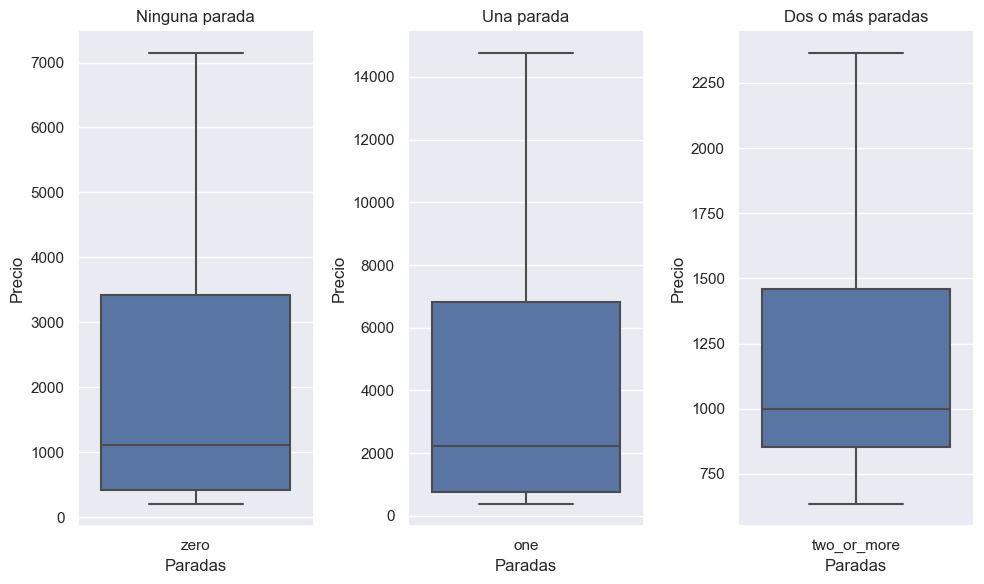

In [80]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

plt.subplot(1, 3, 1)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'zero'])
plt.title('Ninguna parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'one'
plt.subplot(1, 3, 2)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'one'])
plt.title('Una parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'two_or_more'
plt.subplot(1, 3, 3)
sns.boxplot(x='stops', y='dolares', data=data_filtrada[data_filtrada['stops'] == 'two_or_more'])
plt.title('Dos o más paradas')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

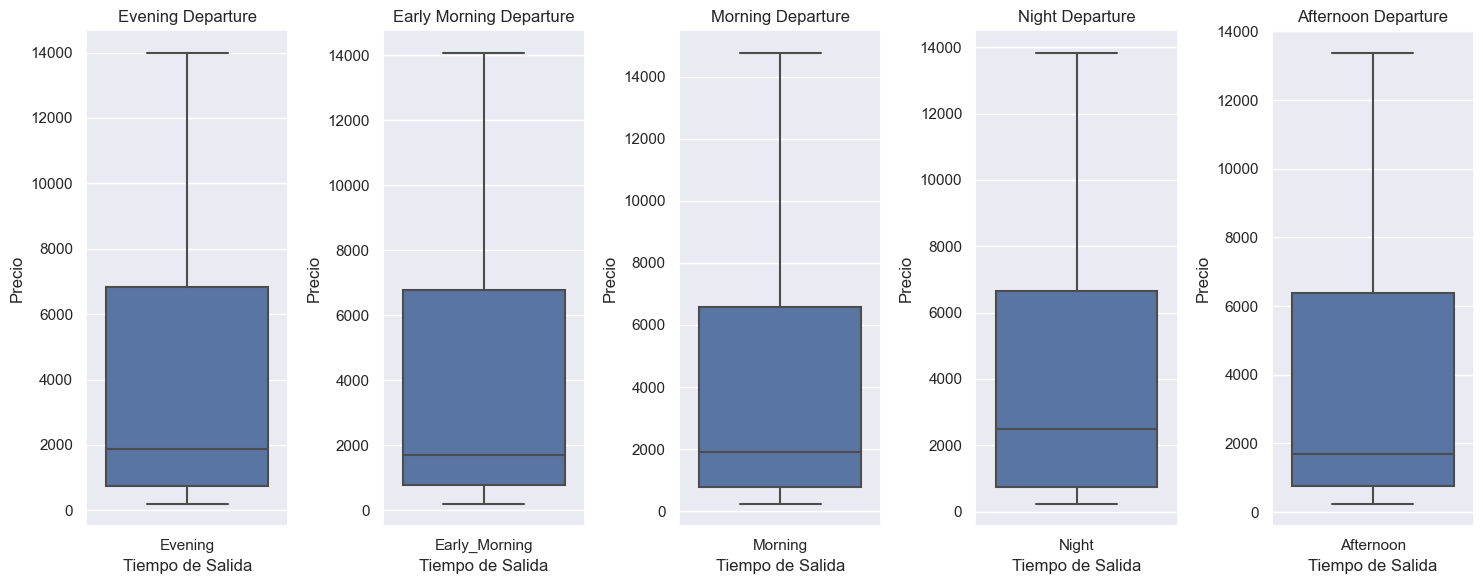

In [81]:
plt.figure(figsize=(15, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Evening'
plt.subplot(1, 5, 1)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Evening'])
plt.title('Evening Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Early_morning'
plt.subplot(1, 5, 2)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Early_Morning'])
plt.title('Early Morning Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Morning'
plt.subplot(1, 5, 3)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Morning'])
plt.title('Morning Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Night'
plt.subplot(1, 5, 4)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Night'])
plt.title('Night Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Afternoon'
plt.subplot(1, 5, 5)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Afternoon'])
plt.title('Afternoon Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

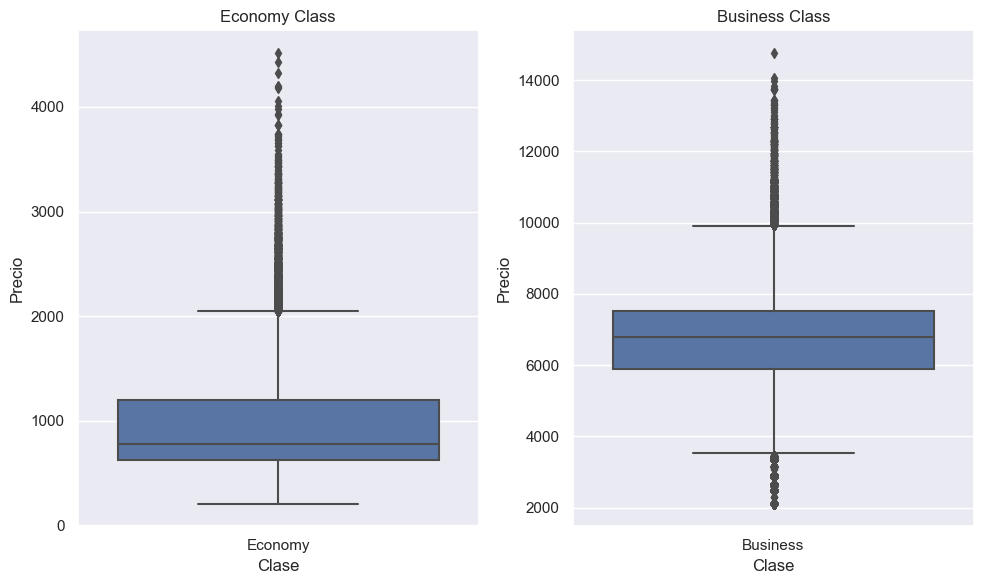

In [82]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Economy'
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='dolares', data=data[data['class'] == 'Economy'])
plt.title('Economy Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Boxplot para 'Business'
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='dolares', data=data[data['class'] == 'Business'])
plt.title('Business Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

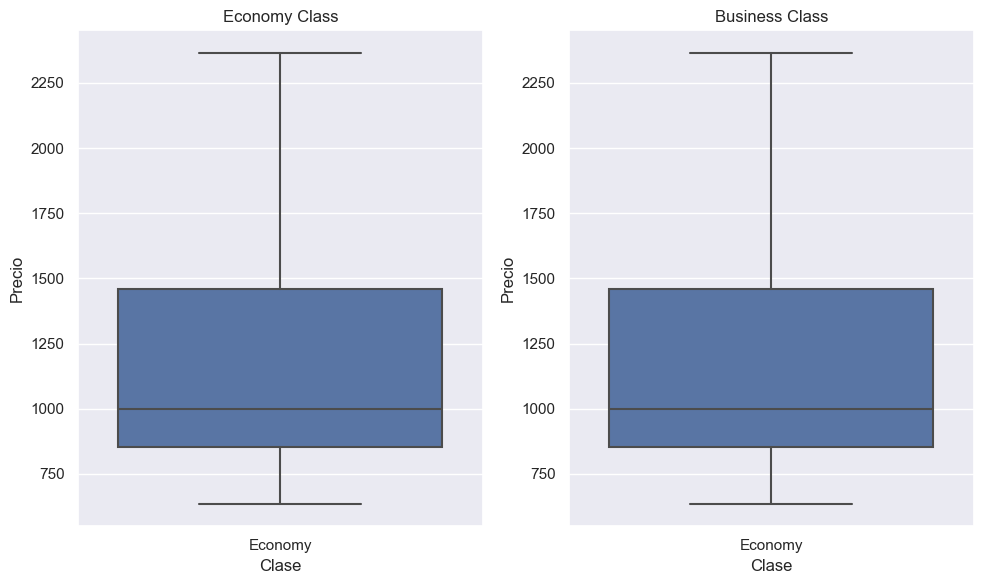

In [83]:
# Función para eliminar valores atípicos según el método del rango intercuartílico (IQR)
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.0 * IQR
    upper_bound = Q3 + 1.0 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Filtrar los datos por cada categoría y crea los boxplots separados
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Filtrar los datos eliminando valores atípicos para 'Economy'
data_economy = remove_outliers(data[data['class'] == 'Economy'], 'dolares')
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='dolares', data=data_filtrada)
plt.title('Economy Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Filtrar los datos eliminando valores atípicos para 'Business'
data_business = remove_outliers(data[data['class'] == 'Business'], 'dolares')
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='dolares', data=data_filtrada)
plt.title('Business Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Ajustar el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

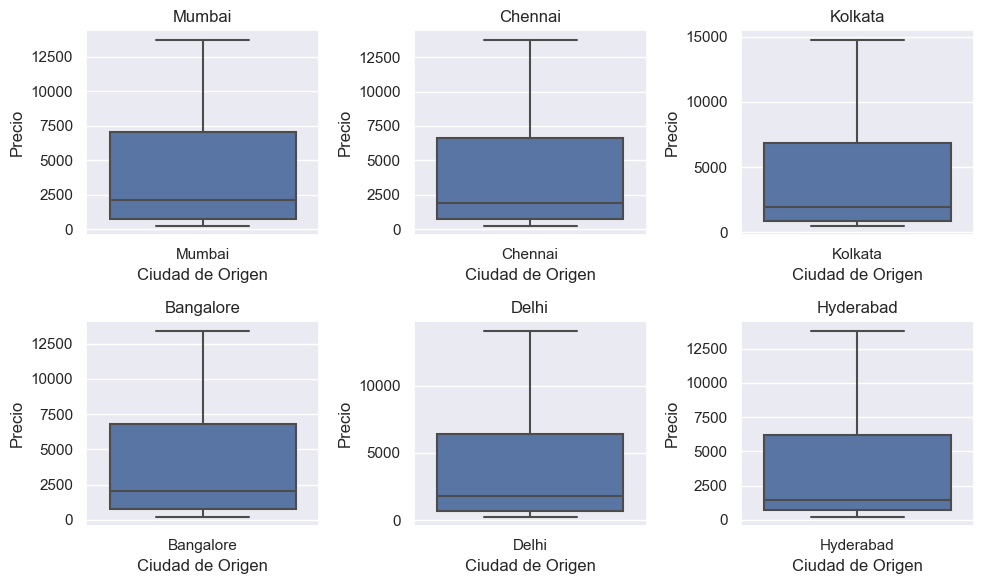

In [84]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Mumbai'
plt.subplot(2, 3, 1)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Mumbai'])
plt.title('Mumbai')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Chennai'
plt.subplot(2, 3, 2)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Chennai'])
plt.title('Chennai')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Kolkata'
plt.subplot(2, 3, 3)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Kolkata'])
plt.title('Kolkata')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Bangalore'
plt.subplot(2, 3, 4)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Bangalore'])
plt.title('Bangalore')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Delhi'
plt.subplot(2, 3, 5)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Delhi'])
plt.title('Delhi')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Hyderabad'
plt.subplot(2, 3, 6)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Hyderabad'])
plt.title('Hyderabad')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

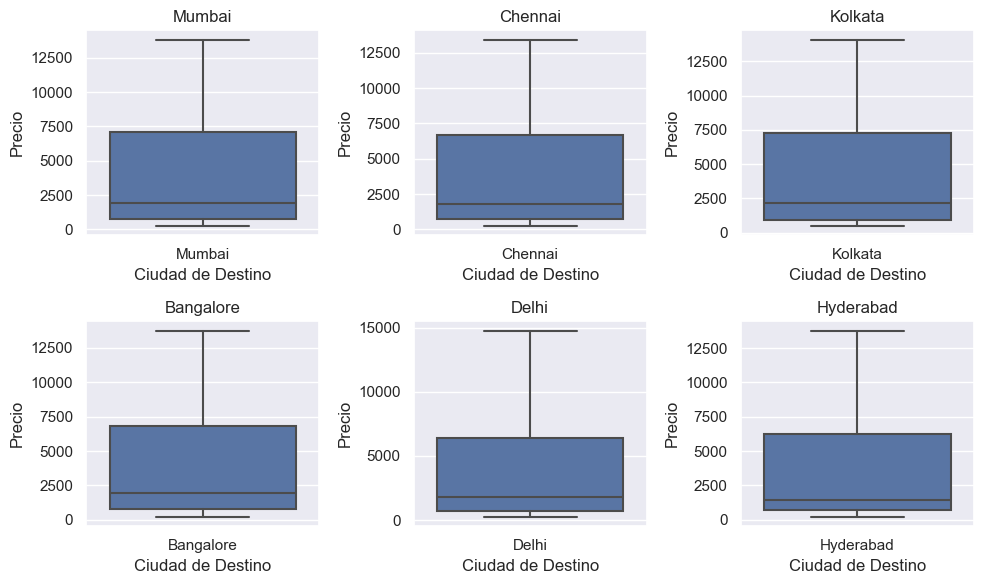

In [85]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Mumbai'
plt.subplot(2, 3, 1)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Mumbai'])
plt.title('Mumbai')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Chennai'
plt.subplot(2, 3, 2)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Chennai'])
plt.title('Chennai')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Kolkata'
plt.subplot(2, 3, 3)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Kolkata'])
plt.title('Kolkata')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Bangalore'
plt.subplot(2, 3, 4)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Bangalore'])
plt.title('Bangalore')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Delhi'
plt.subplot(2, 3, 5)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Delhi'])
plt.title('Delhi')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Hyderabad'
plt.subplot(2, 3, 6)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Hyderabad'])
plt.title('Hyderabad')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

# Pruebas de hipotesis

In [86]:
df = pd.get_dummies(data_filtrada, columns=['stops',"class","departure_time","source_city","destination_city"], drop_first=False)

In [87]:
# Lista de columnas a eliminar
columns_to_drop = ['airline', 'flight', 'class_Economy', 'stops_two_or_more',"arrival_time"]

# Crear una nueva tabla excluyendo las columnas especificadas
df = df.drop(columns=columns_to_drop)

In [88]:
df

,duration,days_left,price,dolares,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Morning,departure_time_Night,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
17708,8.75,19,5294,635.28,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
17709,8.75,20,5294,635.28,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
17710,8.75,21,5294,635.28,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
17711,8.75,22,5294,635.28,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
17712,8.75,26,5294,635.28,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,8.08,15,19636,2356.32,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
66659,13.83,2,19670,2360.40,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
66660,26.67,2,19670,2360.40,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
66661,37.83,2,19670,2360.40,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [97]:
df = df.astype(int)

In [98]:
df

,duration,days_left,price,dolares,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Morning,departure_time_Night,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
17708,8,19,5294,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17709,8,20,5294,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17710,8,21,5294,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17711,8,22,5294,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17712,8,26,5294,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,8,15,19636,2356,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
66659,13,2,19670,2360,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
66660,26,2,19670,2360,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
66661,37,2,19670,2360,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


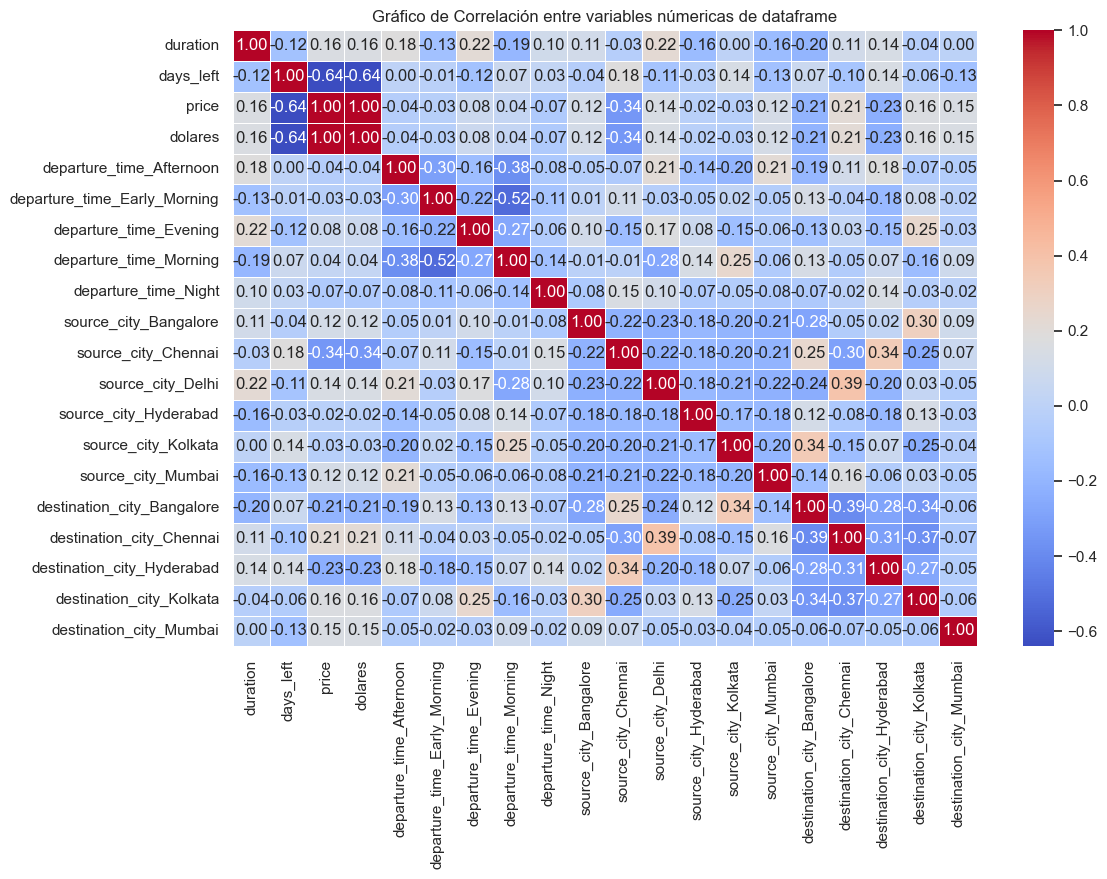

In [89]:
variables_numericas= ['stops',"class","departure_time","source_city","destination_city"]

matriz_correlacion=df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()


In [90]:
# Definir las variables independiente (X) y dependiente (y)
X = df['duration']
y = df['dolares']

# Agregar una constante (intercepción) a la matriz X
X = sm.add_constant(X)

# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           5.00e-30
Time:                        17:50:21   Log-Likelihood:                -39659.
No. Observations:                5299   AIC:                         7.932e+04
Df Residuals:                    5297   BIC:                         7.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1031.4136     13.756     74.979      0.0

In [91]:
# Definir las variables independiente (X) y dependiente (y)
X = data['days_left']
y = data['dolares']

# Agregar una constante (intercepción) a la matriz X
X = sm.add_constant(X)

# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     609.1
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          3.68e-134
Time:                        17:50:21   Log-Likelihood:            -1.2080e+06
No. Observations:              127859   AIC:                         2.416e+06
Df Residuals:                  127857   BIC:                         2.416e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4049.7747     18.419    219.872      0.0

In [92]:
pip install -U scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
#Regresión lineal Multiple

X = df[['days_left', 'duration',"source_city_Chennai","source_city_Delhi","source_city_Hyderabad","source_city_Kolkata","source_city_Mumbai","source_city_Bangalore","destination_city_Bangalore","destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai","departure_time_Afternoon","departure_time_Morning","departure_time_Early_Morning","departure_time_Evening","departure_time_Night"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones utilizando el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 83095.03992157128
R-squared: 0.5492899347844762


Se quitan las variables que no estan aportando información al modelo, por lo tanto eliminar las variables: source_city_Bangalore, destination_city_Bangalore y departure_time_afternoon no afecta significativamente el modelo

In [95]:
#Regresión lineal Multiple

X = df[['days_left',"duration","source_city_Chennai","source_city_Delhi","source_city_Hyderabad","source_city_Kolkata","source_city_Mumbai","destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai","departure_time_Morning","departure_time_Early_Morning","departure_time_Evening","departure_time_Night"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y ajusta el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones utilizando el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 83095.03992157128
R-squared: 0.5492899347844762


Tomamos variables de "Tiempo de salida" para hacer una prueba de hipotesis 

In [99]:
#Regresión lineal Multiple

X = df[["departure_time_Morning","departure_time_Evening","departure_time_Night","departure_time_Early_Morning"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 179889.45669606436
R-squared: 0.02431078152372157
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     9.825
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           6.55e-08
Time:                        17:52:07   Log-Likelihood:                -31774.
No. Observations:                4239   AIC:                         6.356e+04
Df Residuals:                    4234   BIC:                         6.359e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

En resumen, según los valores "P>|t|" proporcionados, "departure_time_Morning", "departure_time_Evening" y "departure_time_Night" parecen tener efectos estadísticamente significativos en la variable dependiente, mientras que "departure_time_Early_Morning" no parece tener un efecto estadísticamente significativo. 

Tomamos variables de "ciudad de salid" para hacer una prueba de hipotesis 

In [100]:
#Regresión lineal Multiple

X = df[["source_city_Chennai","source_city_Delhi","source_city_Hyderabad","source_city_Kolkata","source_city_Mumbai"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 153655.3879887925
R-squared: 0.16659982094028825
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     130.6
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          4.84e-129
Time:                        17:52:17   Log-Likelihood:                -31489.
No. Observations:                4239   AIC:                         6.299e+04
Df Residuals:                    4233   BIC:                         6.303e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

 Según los valores "P>|t|" proporcionados,"source_city_Chennai", "source_city_Hyderabad" y "source_city_Kolkata" parecen tener efectos estadísticamente significativos en la variable dependiente mientras "source_city_Delhi" y "source_city_Mumbai" no muestran efectos estadísticamente significativos.

Tomamos variables de "ciudad de salida" para hacer una prueba de hipotesis 

In [101]:
#Regresión lineal Multiple

X = df[["destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 154479.140366869
R-squared: 0.16213193088855848
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          3.47e-145
Time:                        17:52:20   Log-Likelihood:                -31455.
No. Observations:                4239   AIC:                         6.292e+04
Df Residuals:                    4234   BIC:                         6.295e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Según los valores "P>|t|" proporcionados, todas las variables "destination_city" parecen tener efectos estadísticamente significativos en la variable dependiente. Estos resultados sugieren que la ciudad de destino tiene un impacto significativo en el resultado del modelo.

Tomamos la variable "dias restantes" 

In [102]:
#Regresión lineal Multiple
X = df[["days_left"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 107509.97962096865
R-squared: 0.416884513848896
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     2922.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:52:34   Log-Likelihood:                -30681.
No. Observations:                4239   AIC:                         6.137e+04
Df Residuals:                    4237   BIC:                         6.138e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Tomando el R Cuadrado y el P>|t| primera nos damos que cuenta que el R cuadrado es muy significativo con respecto al 0.54 que se obtuvo con todas las variables por lo que es una variable significativa y ademas su P>|t| tiene un valor muy bajo, prácticamente cero.Se considera que esta variable tiene un impacto estadísticamente significativo en la variable dependiente.

In [103]:
#Regresión lineal Multiple
X = df[["duration"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 182054.57030026428
R-squared: 0.012567580787041455
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     119.0
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.41e-27
Time:                        17:52:37   Log-Likelihood:                -31735.
No. Observations:                4239   AIC:                         6.347e+04
Df Residuals:                    4237   BIC:                         6.349e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Al demostrar un R cuadrado tan bajo aunque tenga un P>|t| bajo que implicaria una significancia no sera tomado como relevante

Finalmente se decidio tomar como las variables independientes:
"days_left" y "destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai"
Y como variable dependiente:
"dolares"

Para el metodo de regresión lineal simple por medio de matrices usaremos la variable dependiente que mas R cuadrado mostro durante las anteriores pruebas:
"days_left"

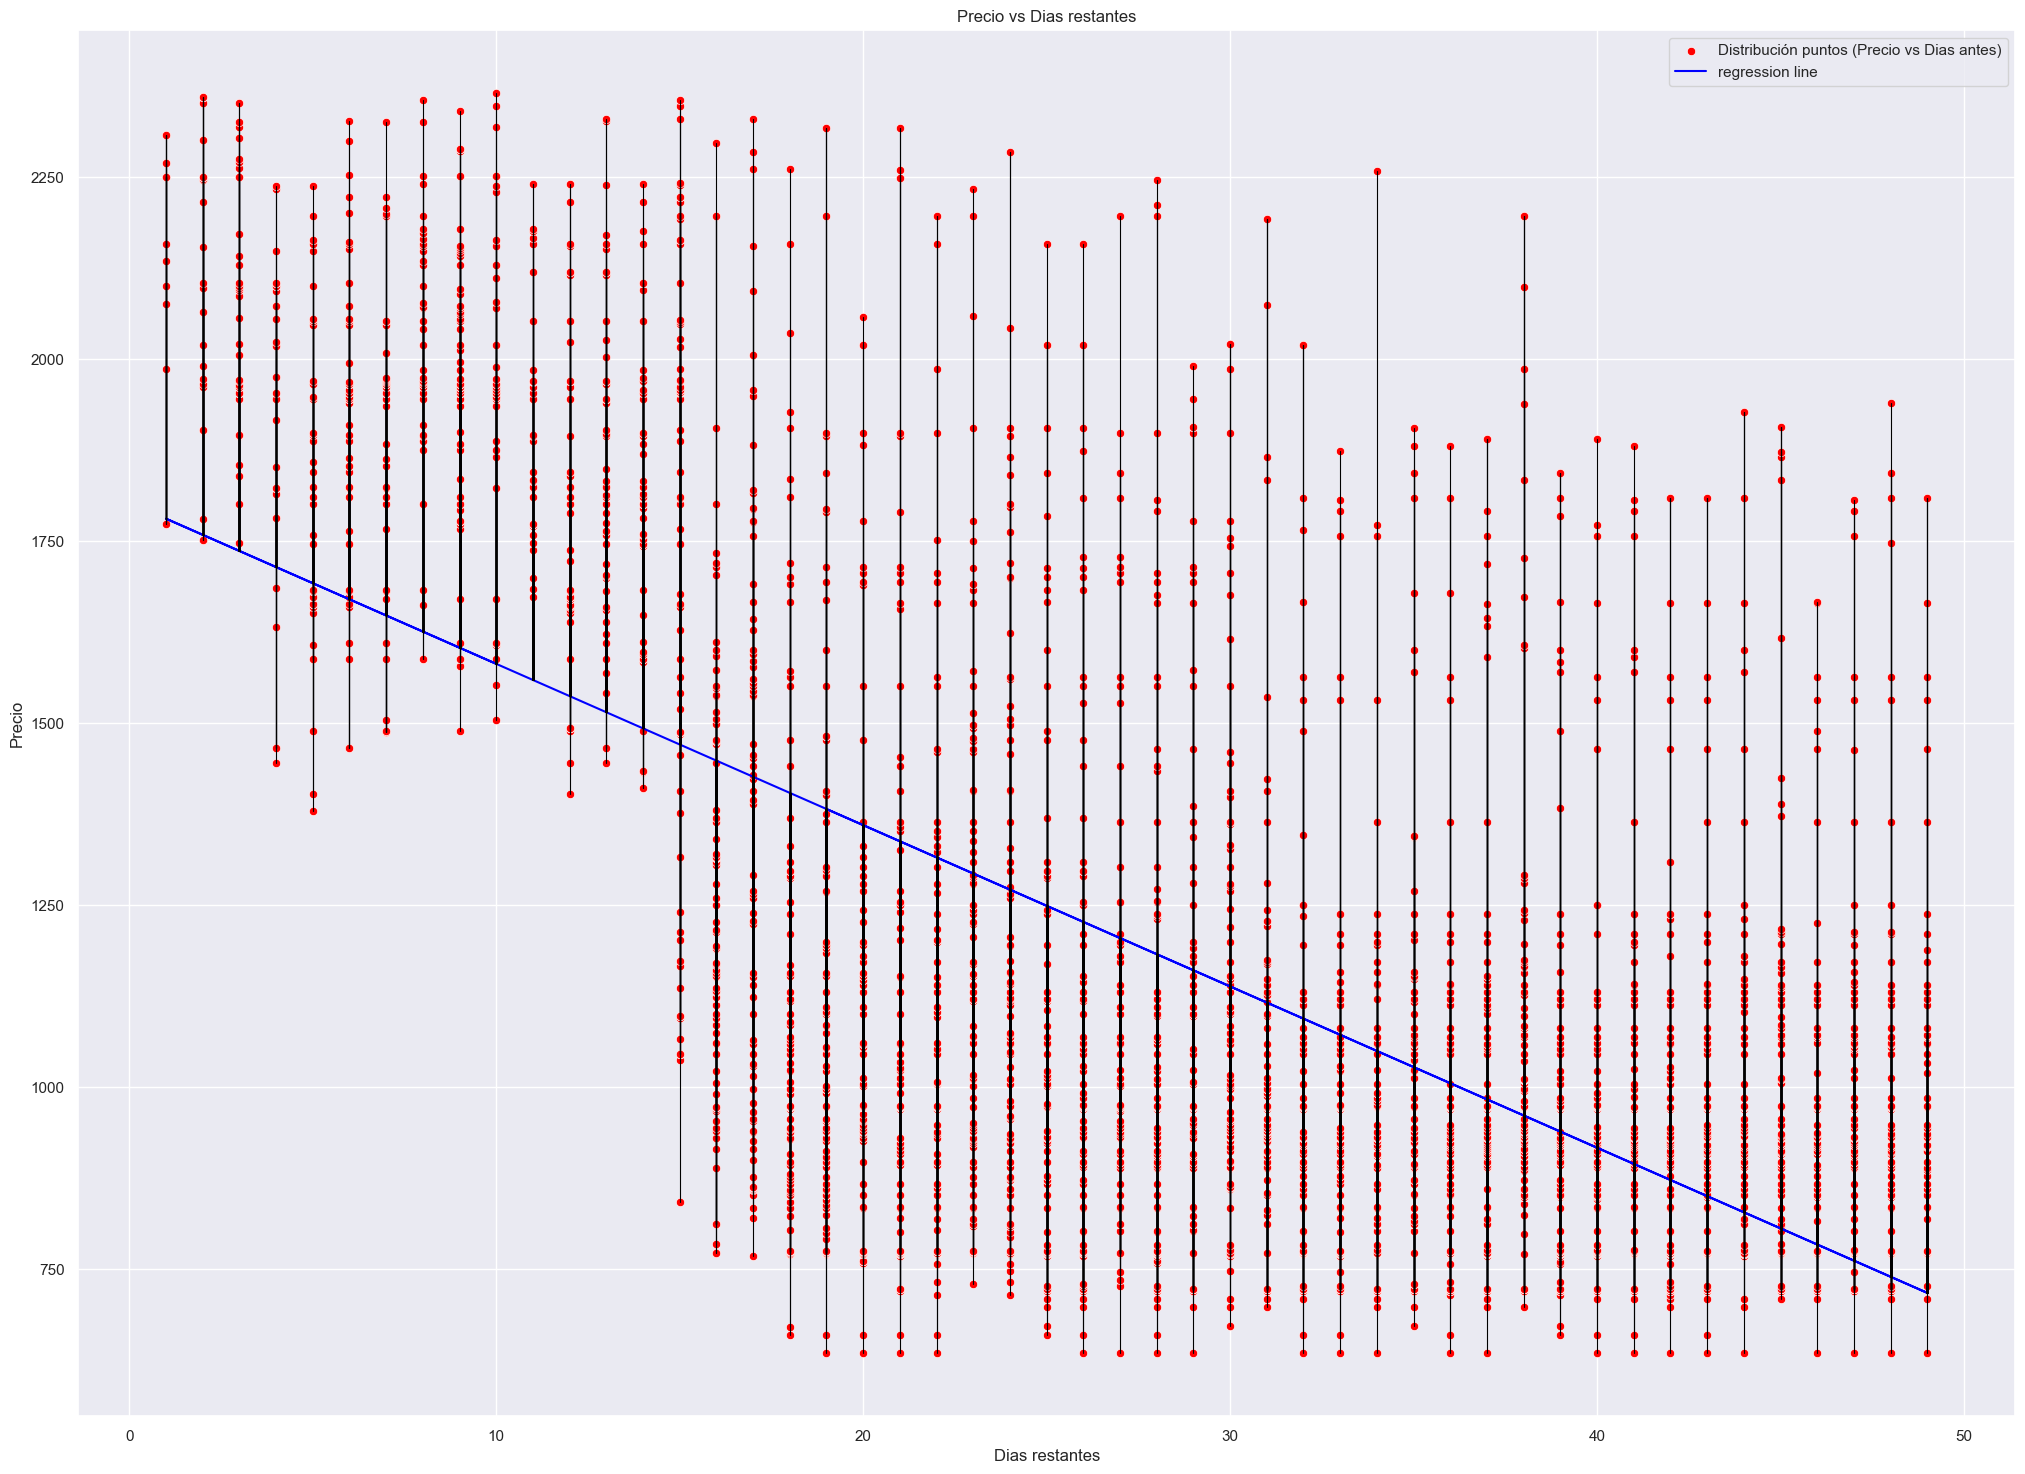

In [104]:
#Regresión lineal larga
# Crear el gráfico de dispersión con puntos de datos en rojo
plt.figure(figsize=(25, 18))
sns.scatterplot(x='days_left', y='dolares', data=df, color='red', label='Distribución puntos (Precio vs Dias antes)')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df['days_left'], df['dolares'], 1)
plt.plot(df['days_left'], slope * df['days_left'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df.iterrows():
    x = row['days_left']
    y_actual = row['dolares']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('Dias restantes')
plt.ylabel('Precio')
plt.title('Precio vs Dias restantes')
plt.legend()

# Mostrar el gráfico
plt.show()

In [105]:
# Extraer las columnas como matrices numpy
X = df['days_left'].values
y = df['dolares'].values

# Agregar una columna de unos para la constante (intercepción)
X_matrix = np.column_stack((np.ones(X.shape[0]), X))

print("matriz columna de unos")
print(X_matrix)

# Calcular los coeficientes utilizando la fórmula matricial (X^T * X)^(-1) * X^T * y
coefficients = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

# Calcular las predicciones
predictions = X_matrix @ coefficients

# Calcular el error residual
residuals = y - predictions

# Grados de libertad
n = len(y)
p = X_matrix.shape[1] - 1
dof = n - p - 1

# Calcular el error estándar residual (residual standard error)
residual_std_error = np.sqrt(np.sum(residuals**2) / dof)

# Calcular el coeficiente de determinación R2
total_sum_squares = np.sum((y - np.mean(y))**2)
explained_sum_squares = np.sum((predictions - np.mean(y))**2)
r_squared = explained_sum_squares / total_sum_squares

# Calcular la estadística F
f_statistic = (explained_sum_squares / p) / (residuals.T @ residuals / dof)

# Crear una tabla con los resultados
results_table = pd.DataFrame({
    'Coeficiente': coefficients,
    'Error estándar': np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Estadístico t': coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Valor p': 2 * (1 - stats.t.cdf(np.abs(coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2)), dof)),
}, index=['Intercepto', 'days_left'])

print("Resultados de la Regresión:")
print(results_table)
print("\nResidual Standard Error:", residual_std_error)
print("Coeficiente de determinación R2:", r_squared)
print("Estadística F:", f_statistic)

matriz columna de unos
[[ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 ...
 [ 1.  2.]
 [ 1.  2.]
 [ 1. 10.]]
Resultados de la Regresión:
            Coeficiente  Error estándar  Estadístico t  Valor p
Intercepto  1803.058987       11.356645     158.766864      0.0
days_left    -22.146743        0.365045     -60.668574      0.0

Residual Standard Error: 334.95100097690664
Coeficiente de determinación R2: 0.40998092294173555
Estadística F: 3680.6758175514337


Método regresión lineal simple multiple Largo

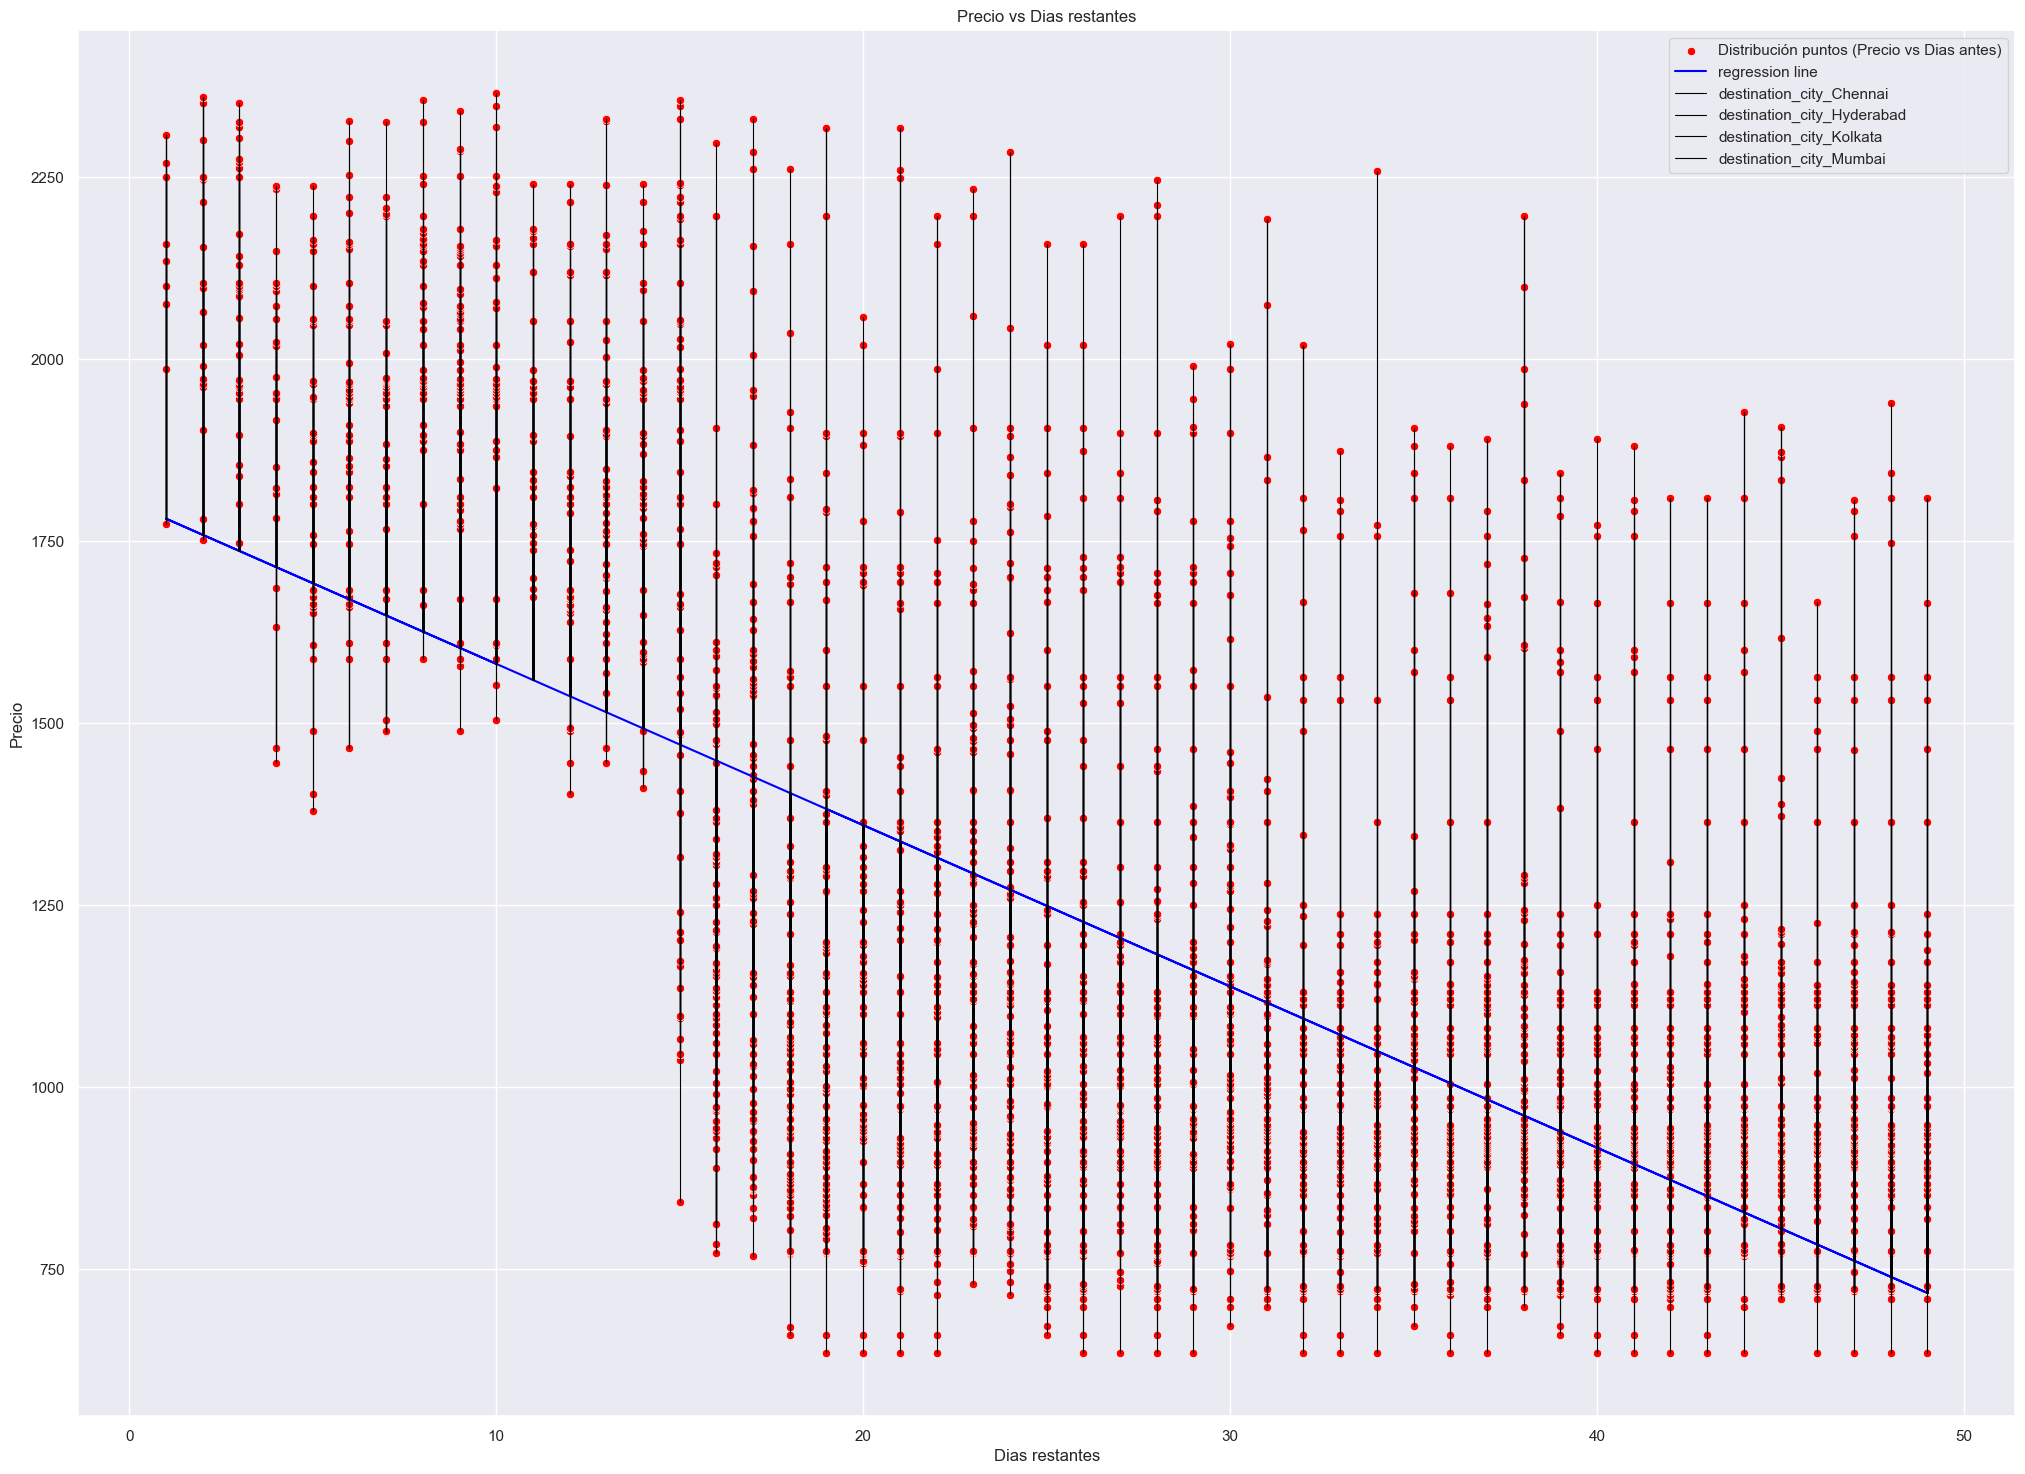

In [106]:
plt.figure(figsize=(25, 18))
sns.scatterplot(x='days_left', y='dolares', data=df, color='red', label='Distribución puntos (Precio vs Dias antes)')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df['days_left'], df['dolares'], 1)
plt.plot(df['days_left'], slope * df['days_left'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df.iterrows():
    x = row['days_left']
    y_actual = row['dolares']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('Dias restantes')
plt.ylabel('Precio')
plt.title('Precio vs Dias restantes')

# Agregar las variables destination_city a la leyenda
legend_labels = ['Distribución puntos (Precio vs Dias antes)', 'regression line']
for city in ['Chennai', 'Hyderabad', 'Kolkata', 'Mumbai']:
    legend_labels.append(f'destination_city_{city}')
    
plt.legend(legend_labels)

# Mostrar el gráfico
plt.show()

In [107]:
# Extraer las columnas como matrices numpy
X_days_left = df['days_left'].values
X_destination_chennai = df['destination_city_Chennai'].values
X_destination_hyderabad = df['destination_city_Hyderabad'].values
X_destination_kolkata = df['destination_city_Kolkata'].values
X_destination_mumbai = df['destination_city_Mumbai'].values

y = df['dolares'].values

# Agregar una columna de unos para la constante (intercepción)
X_matrix = np.column_stack((np.ones(X_days_left.shape[0]), X_days_left, 
                            X_destination_chennai, X_destination_hyderabad, 
                            X_destination_kolkata, X_destination_mumbai))

# Calcular los coeficientes utilizando la fórmula matricial (X^T * X)^(-1) * X^T * y
coefficients = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

# Resto del código (calculación de predicciones, error residual, grados de libertad, etc.)

# Crear una tabla con los resultados
results_table = pd.DataFrame({
    'Coeficiente': coefficients,
    'Error estándar': np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Estadístico t': coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Valor p': 2 * (1 - stats.t.cdf(np.abs(coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2)), dof)),
}, index=['Intercepto', 'days_left', 'destination_city_Chennai', 
          'destination_city_Hyderabad', 'destination_city_Kolkata', 
          'destination_city_Mumbai'])

print("Resultados de la Regresión:")
print(results_table)
print("\nResidual Standard Error:", residual_std_error)
print("Coeficiente de determinación R2:", r_squared)
print("Estadística F:", f_statistic)

Resultados de la Regresión:
                            Coeficiente  Error estándar  Estadístico t  \
Intercepto                  1629.325348       14.306558     113.886611   
days_left                    -20.353364        0.373807     -54.448860   
destination_city_Chennai     224.723745       12.361296      18.179626   
destination_city_Hyderabad   -16.537213       14.050990      -1.176943   
destination_city_Kolkata     221.041941       12.922830      17.104763   
destination_city_Mumbai      441.195913       47.333263       9.321054   

                             Valor p  
Intercepto                  0.000000  
days_left                   0.000000  
destination_city_Chennai    0.000000  
destination_city_Hyderabad  0.239271  
destination_city_Kolkata    0.000000  
destination_city_Mumbai     0.000000  

Residual Standard Error: 334.95100097690664
Coeficiente de determinación R2: 0.40998092294173555
Estadística F: 3680.6758175514337


Analisis de regresión

Método de Regresión simple multivariada rapida

Aalisis de correlación con X1 (days_left) y X2 (destination_city_Hyderabad)

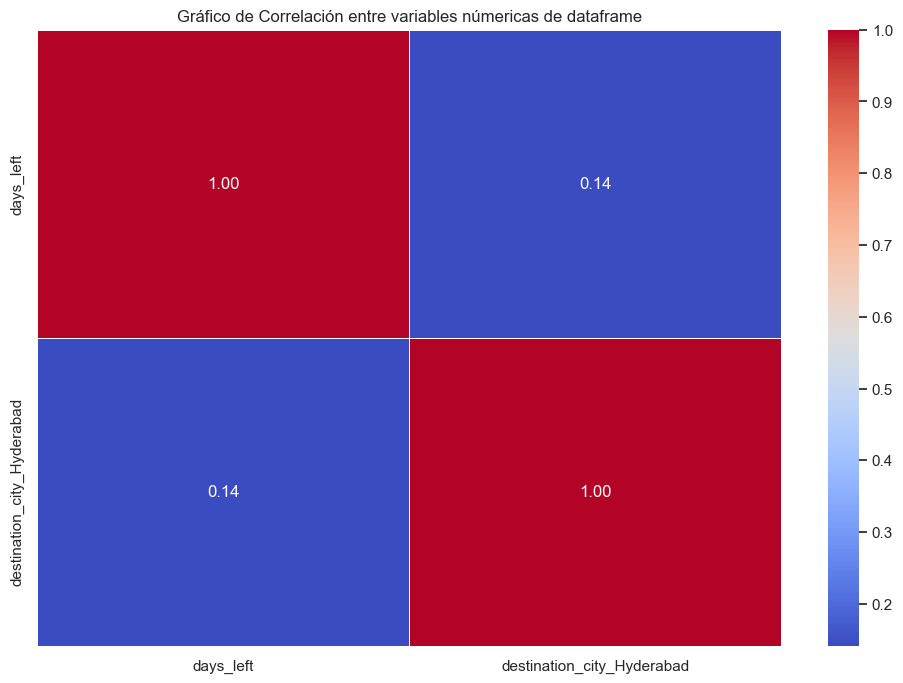

In [108]:
variables_numericas= ["days_left","destination_city_Hyderabad"]

matriz_correlacion=df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

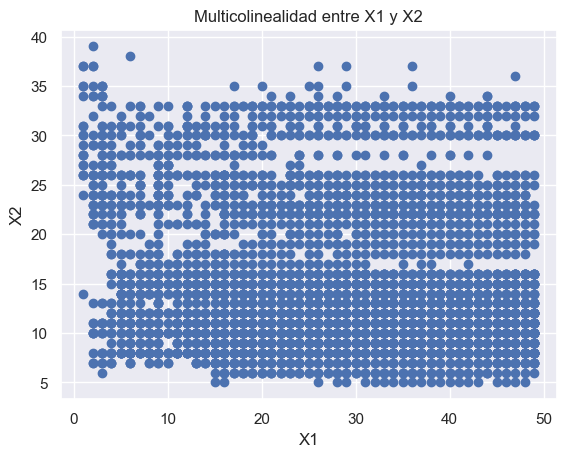

In [109]:
#Problema 1 de multicolinealidad
# Crear un DataFrame
data = pd.DataFrame({'X1': df['days_left'], 'X2': df['duration'], 'y': df['dolares']})

# Gráfica de correlación entre X1 y X2
plt.scatter(data['X1'], data['X2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Multicolinealidad entre X1 y X2')
plt.show()

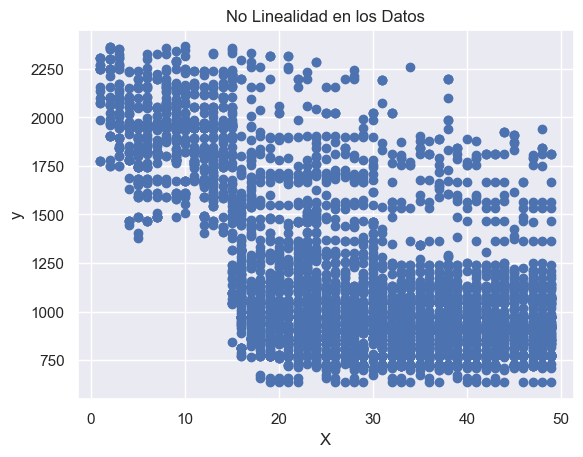

In [110]:
# Crear un DataFrame
data = pd.DataFrame({'X': df["days_left"], 'y': df["dolares"]})

# Gráfica de dispersión de y vs. X
plt.scatter(data['X'], data['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('No Linealidad en los Datos')
plt.show()

In [111]:
variables = ["days_left"]  # Variables a considerar

best_model = None
best_aic = float("inf")
best_bic = float("inf")
best_cp = float("inf")

for subset_size in range(1, len(variables) + 1):
    for subset in combinations(variables, subset_size):
        X = df[list(subset)]
        X = sm.add_constant(X)  # Añade una columna de constantes para el intercepto
        y = df["dolares"]  # Variable objetivo
        
        model = sm.OLS(y, X).fit()
        aic = model.aic
        bic = model.bic
        cp = model.mse_model / model.mse_resid
        
        if aic < best_aic:
            best_aic = aic
            best_model = model
        
        if bic < best_bic:
            best_bic = bic
        
        if cp < best_cp:
            best_cp = cp

print("Best AIC:", best_aic)
print("Best BIC:", best_bic)
print("Best CP:", best_cp)

Best AIC: 76656.51533596574
Best BIC: 76669.66588277073
Best CP: 3680.675817551425
